# Molecular Hydrogen H<sub>2</sub> Ground State & Lyman/Werner Bands

Figure 7.5 from Chapter 7 of *Interstellar and Intergalactic Medium* by Ryden & Pogge, 2021, 
Cambridge University Press.

Plot the potential energy (energy vs. interproton distance) and the bound
vibration levels for the ground state and first two excited electronic states of the H<sub>2</sub> molecule.
These two excited states give rise to the Lyman and Werner bands in the ultraviolet.

Uses files with the H<sub>2</sub> potential curves tabulated by
[Sharp, 1971, Atomic Data, 2, 119](https://ui.adsabs.harvard.edu/abs/1971AD......2..119S/abstract).

All of the data files used are in the `H2` subfolder that should accompany this notebook.

In [5]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

# OS-agnostic path handling

from pathlib import Path

# suppress nuisance warnings

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot. Fonts and resolution adopted follow CUP style.

In [6]:
figName = 'Fig7_5' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 # 4:3

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# output format and resolution

figFmt = 'png'
dpi = 600

# Graphic dimensions 

plotWidth = dpi*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = textWidth 
hInches = wInches/aspect

# Plot filename

plotFile = f'{figName}.{figFmt}'

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad'] = f'{axisPad}'
plt.rcParams['ytick.major.pad'] = f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## H<sub>2</sub> potential energy and vibrational level data 

H$_2$ level data from Sharp 1971:
 * $^{1}\Sigma_{g}^{+}$ ground state
 * $^{1}\Sigma_{u}^{+}$ first electronic state (Lyman band)
 * $^{1}\Pi_{u}^{+}$ second electronic state (Werner band)
 
For each level, there are two files:

Potential curve: `_potl.dat`:
 * `R` - interproton distance, r, in Angstroms
 * `eV` - potential energy, V(r), in eV
 
Vibrational levels: `_v.dat`:
 * `v` = vibrational quantum number
 * `eV` = energy in eV
 * `Rmin` = minimum inter-proton distance in Angstroms
 * `Rmax` = maximum inter-proton distance in Angstroms

In [7]:
# potential curves

potlFile = str(Path("H2") / "H2_1Sigma_g+_potl.dat")
data = pd.read_csv(potlFile,sep=r'\s+',comment='#')
gsR = np.array(data['R'])   # radius in Angstroms
gsE = np.array(data['eV'])  # energy in eV

potlFile = str(Path("H2") / "H2_1Sigma_u+_potl.dat")
data = pd.read_csv(potlFile,sep=r'\s+',comment='#')
lymanR = np.array(data['R'])   # radius in Angstroms
lymanE = np.array(data['eV'])  # energy in eV

potlFile = str(Path("H2") / "H2_1Pi_u_potl.dat")
data = pd.read_csv(potlFile,sep=r'\s+',comment='#')
wernerR = np.array(data['R'])   # radius in Angstroms
wernerE = np.array(data['eV'])  # energy in eV

# vibrational levels

vibFile = str(Path("H2") / "H2_1Sigma_g+_v.dat")
data = pd.read_csv(vibFile,sep=r'\s+',comment='#')
gs_v = np.array(data['v'])
gsEv = np.array(data['eV'])
gsRmin = np.array(data['Rmin'])
gsRmax = np.array(data['Rmax'])

vibFile = str(Path("H2") / "H2_1Sigma_u+_v.dat")
data = pd.read_csv(vibFile,sep=r'\s+',comment='#')
lyman_v = np.array(data['v'])
lymanEv = np.array(data['eV'])
lymanRmin = np.array(data['Rmin'])
lymanRmax = np.array(data['Rmax'])

vibFile = str(Path("H2") / "H2_1Pi_u_v.dat")
data = pd.read_csv(vibFile,sep=r'\s+',comment='#')
werner_v = np.array(data['v'])
wernerEv = np.array(data['eV'])
wernerRmin = np.array(data['Rmin'])
wernerRmax = np.array(data['Rmax'])

# plotting limits

minR = -0.1
maxR = 3.0
minE = -1.5
maxE = 16.0

# Put labels on the vibrational levels?

label_v = False

### Make the Plot

Plot the ground-state and excited state potential curves as thick black line, then draw the vibrational energy
levels for each, labeling the electronic states.  Use arrows at the left to indicate the transitions at the
Lyman and Werner $v=0-0$ band heads.  Show the groundstate $v=14$ as a dashed line.

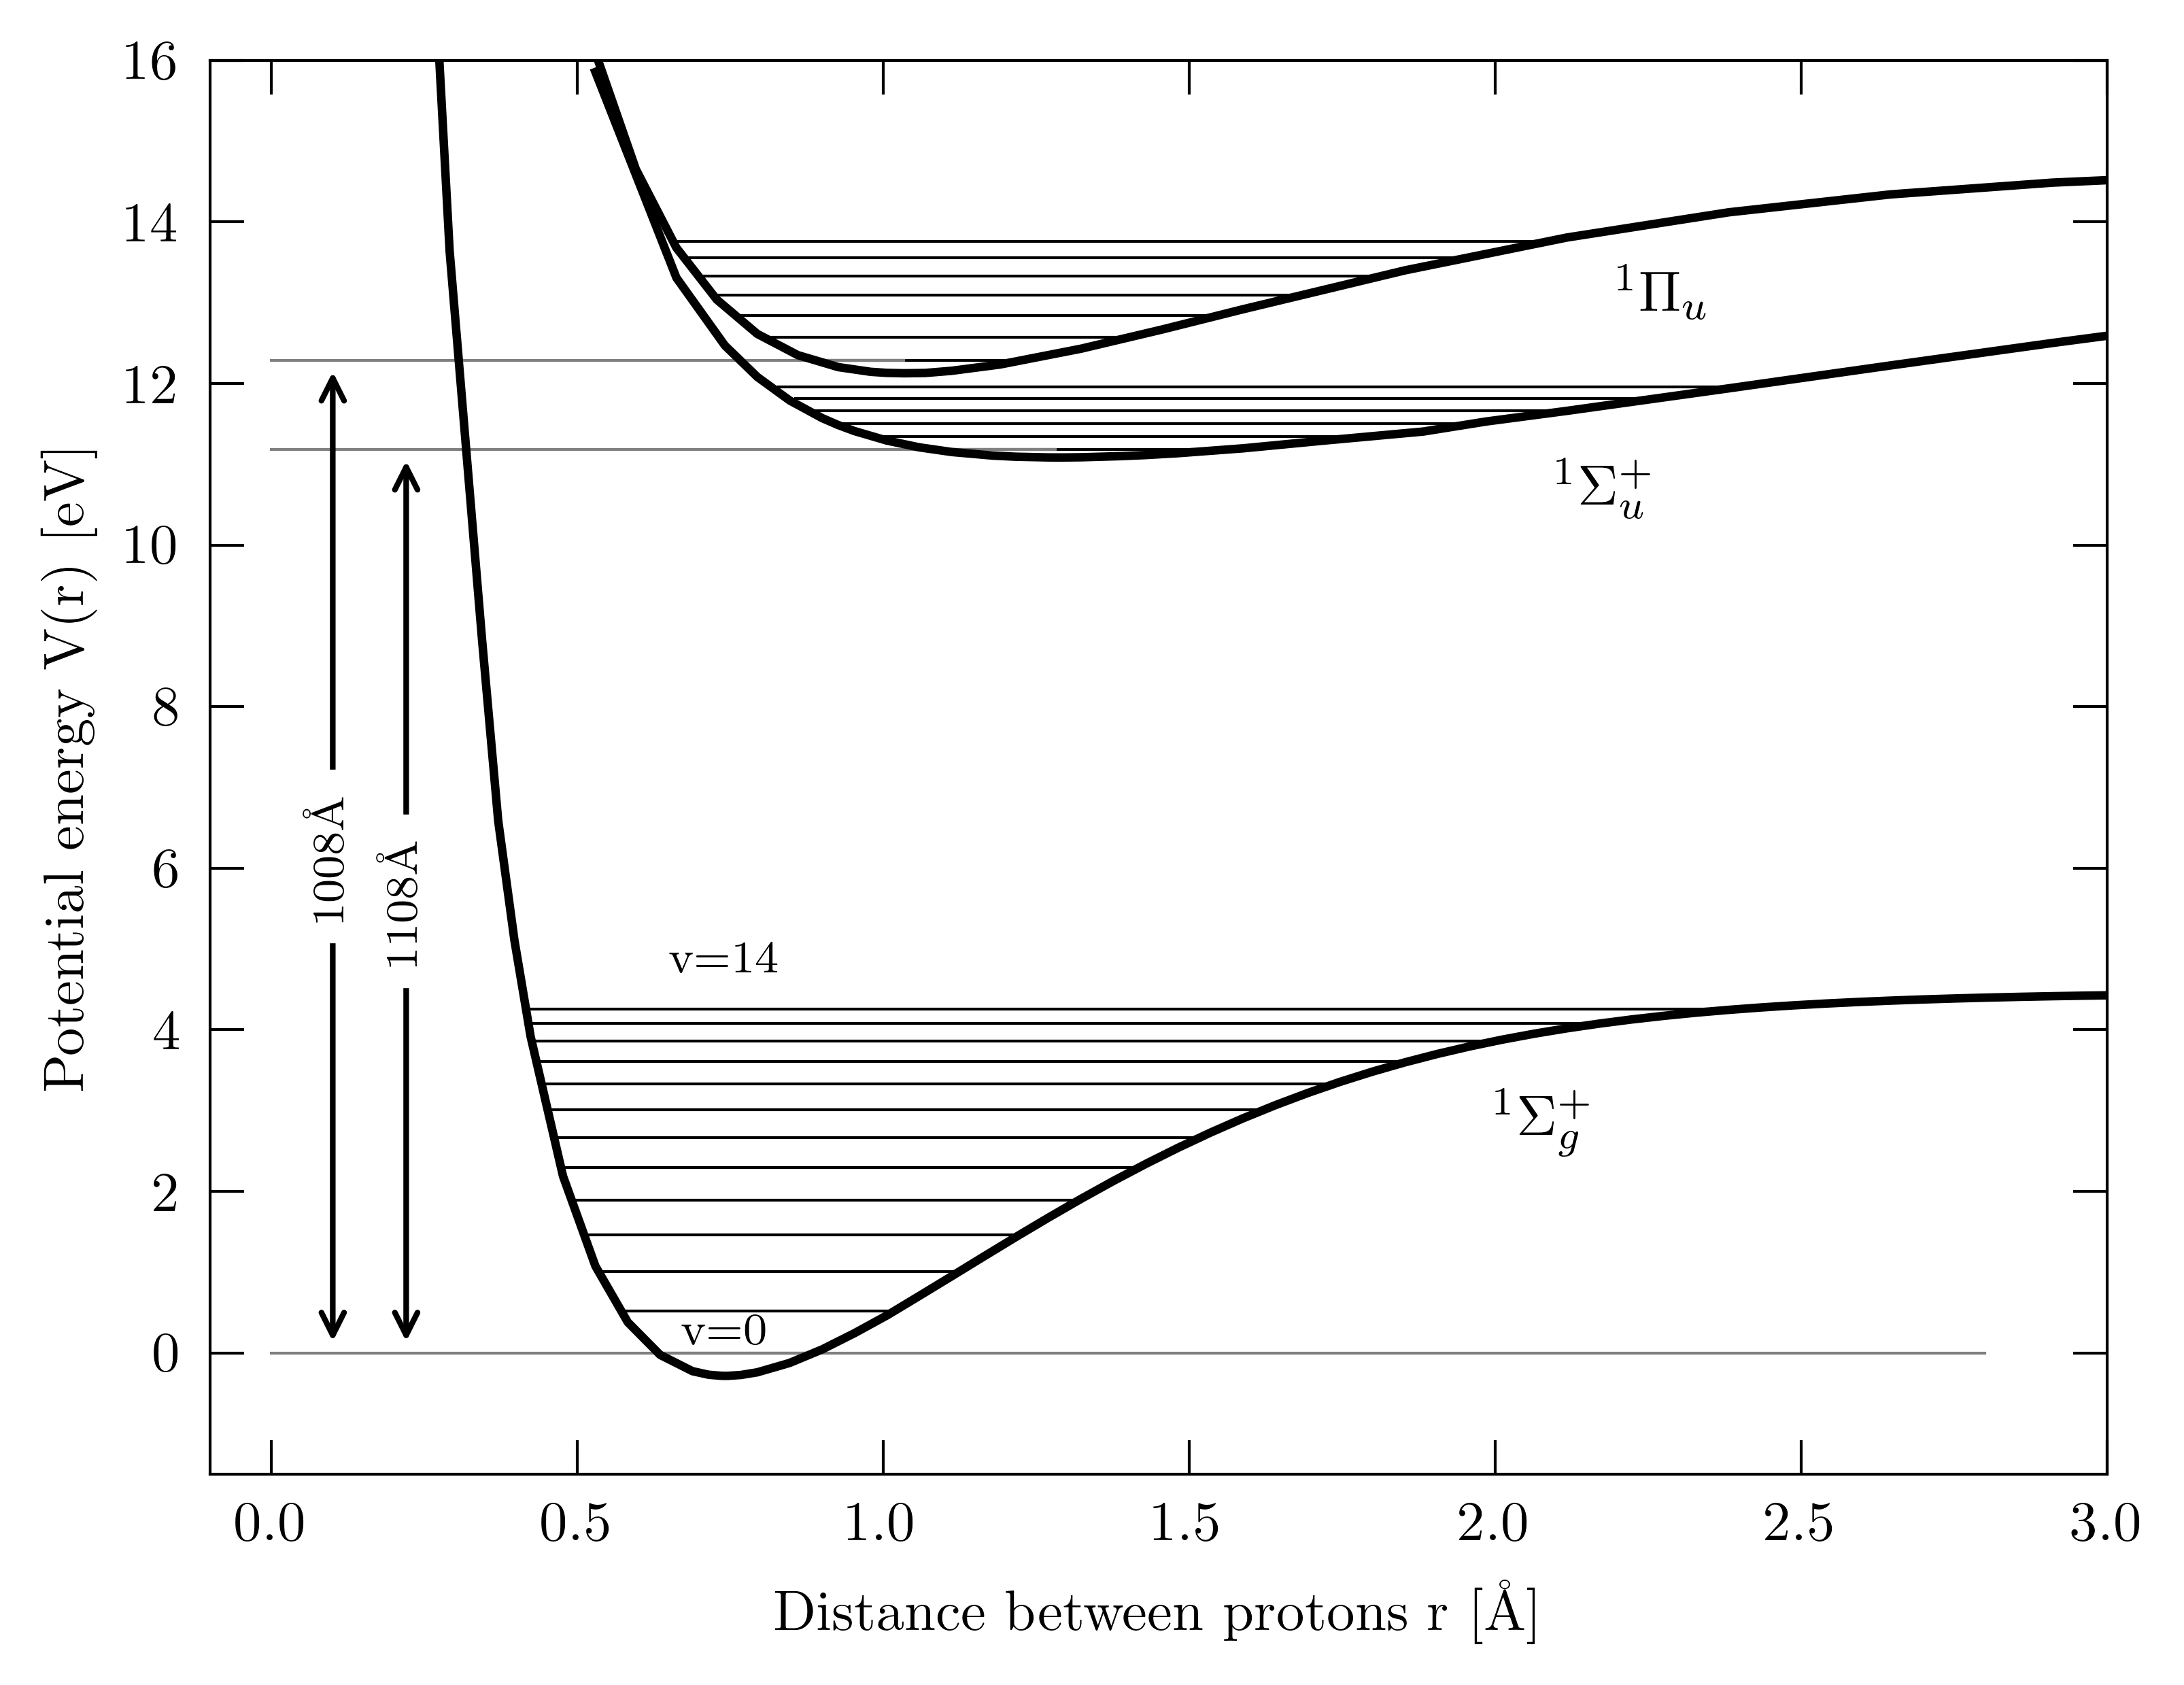

In [8]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

ax.set_xlim(minR,maxR)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.set_xlabel(r'Distance between protons r [\AA]',fontsize=axisFontSize)

ax.set_ylim(minE,maxE)
ax.yaxis.set_major_locator(MultipleLocator(2.0))
ax.set_ylabel(r'Potential energy V(r) [eV]',fontsize=axisFontSize)

# plot the curves

lwV = 1.5

ax.plot(gsR,gsE,'-',color='black',lw=lwV,zorder=10)
ax.plot(wernerR,wernerE,'-',color='black',lw=lwV,zorder=10)
ax.plot(lymanR,lymanE,'-',color='black',lw=lwV,zorder=10)

# Vibrational states

for i, v in enumerate(gs_v):
    if v < 13:
        ax.hlines(gsEv[i],gsRmin[i],gsRmax[i],colors=['black'],ls=['-'],lw=0.5)

for i, v in enumerate(lyman_v):
    if v < 6:
        ax.hlines(lymanEv[i],lymanRmin[i],lymanRmax[i],colors=['black'],ls=['-'],lw=0.5)

for i, v in enumerate(werner_v):
    if v < 7:
        ax.hlines(wernerEv[i],wernerRmin[i],wernerRmax[i],colors=['black'],ls=['-'],lw=0.5)

ax.vlines(4.476,0.4138,2.8,colors=['black'],ls=['--'],lw=1.5*lwidth)

# Some useful(?) guide lines in the lowest layer

# E=0/v(1)=0 ground state

ax.plot([0.0,2.8],[0.0,0.0],ls='-',lw=lwidth,color='gray')

ax.plot([0.0,1.2806],[11.1839,11.1839],ls='-',lw=lwidth,color='gray')

ax.annotate('',xy=(0.22,0.0),xycoords='data',xytext=(0.22,11.1839),textcoords='data',
            arrowprops={'arrowstyle':'<->'},color='black')

ax.text(0.22,(11.1839/2.0),r'1108\AA',ha='center',va='center',rotation=90.0,
        color='black',backgroundcolor='white',fontsize=labelFontSize)

ax.plot([0.0,1.0329],[12.2860,12.2860],ls='-',lw=lwidth,color='gray')

ax.annotate('',xy=(0.1,0.0),xycoords='data',xytext=(0.1,12.2860),textcoords='data',
            arrowprops={'arrowstyle':'<->'},color='black')

ax.text(0.1,(12.2860/2.0),r'1008\AA',ha='center',va='center',rotation=90.0,
        color='black',backgroundcolor='white',fontsize=labelFontSize)

# Labels

ax.text(2.0,2.7,r'$^1\Sigma_g^+$',fontsize=axisFontSize)

ax.text(2.1,10.5,r'$^1\Sigma_u^+$',fontsize=axisFontSize)

ax.text(2.2,12.9,r'$^1\Pi_u$',fontsize=axisFontSize)

# ax.text(2.5,4.7,r'H(1s)+H(1s)',fontsize=axisFontSize,ha='center')

ax.text(0.74,4.7,r'v=14',fontsize=labelFontSize,ha='center')
ax.text(0.74,0.1,r'v=0',fontsize=labelFontSize,ha='center')

# plot and file

plt.savefig(plotFile,bbox_inches='tight',facecolor='white')

plt.show()